## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark',)
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

## Reading the data

This dataset has the data of customers who buys clothes online. The store offers in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

In [3]:
data=pd.read_csv("Ecommerce Customers.csv")

## Exploratory Data Analysis

## Understanding the data

In [4]:
data.shape

(500, 8)

So, there are 8 attributes with a data of 500 rows. These attributes gives the information regarding the customers personal details, Email, Address and Avatar and also the customer usage statistics of the app or website. 
The attributes in the data are,

1) Email - Email id of the customer

2) Address - Address of the customer

3) Avatar - Profile avatar of the account

4) Avg.Session Length - Average time spent by customer in a session

5) Time on App - Time spent on the mobile application

6) Time on Website - Time spent on the online website

7) Length of Membership - Length of Membership that customer has opted for

8) Yearly Amount Spent - Total amount spent by customer in a year

In [5]:
data.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
data.tail(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [7]:
# Checking the datatypes of variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


The columns Email, Address and Avatar has unique values in almost every row and does not impact the target variable, Yearly Amount Spent. So dropping those three columns would be better for the further analysis.

In [8]:
data.drop(columns=['Email','Address','Avatar'],axis=1,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


## Checking for Missing Values

In [10]:
# Checking for missing values
data.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

### Observations

* There are no categorical variables in the dataset
* There are 4 continuous independent variables, Avg.Session Length, Time on App, Time on Website and Length of Membership.
* The target variable Yearly Amount Spent is also a continuous variable.
* There are no missing values in any of the columns of the dataset.

## Outlier Detection

Text(0.5, 1.0, 'Avg. Session Length')

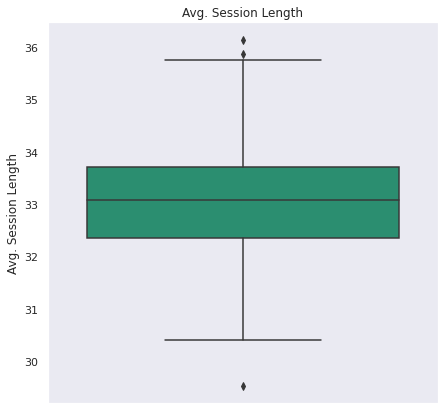

In [11]:
# Boxplot of Avg. Session Length

fig = plt.figure(figsize=(7,7))
sns.boxplot(y=data['Avg. Session Length'], palette='Dark2')
plt.title('Avg. Session Length')

Text(0.5, 1.0, 'Time on App')

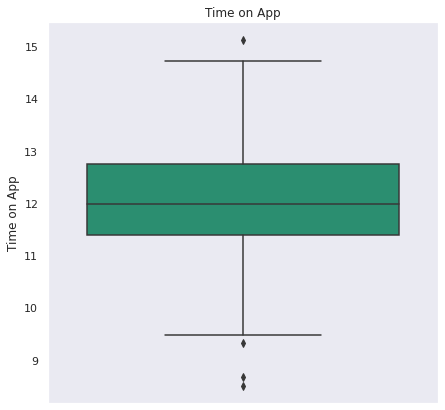

In [12]:
# Boxplot of Time on App

fig = plt.figure(figsize=(7,7))
sns.boxplot(y=data['Time on App'], palette='Dark2')
plt.title('Time on App')

Text(0.5, 1.0, 'Time on Website')

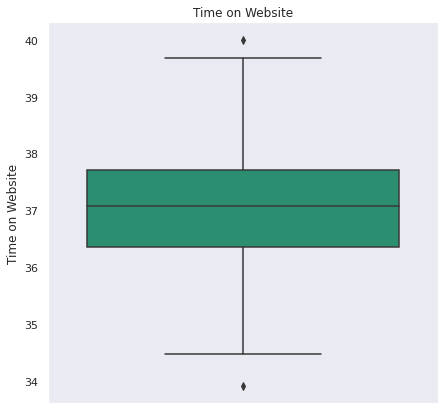

In [13]:
# Boxplot of Time on Website

fig = plt.figure(figsize=(7,7))
sns.boxplot(y=data['Time on Website'], palette='Dark2')
plt.title('Time on Website')

Text(0.5, 1.0, 'Length of Membership')

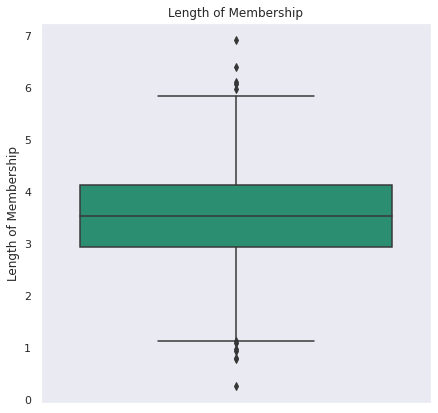

In [14]:
# Boxplot of Length of Membership

fig = plt.figure(figsize=(7,7))
sns.boxplot(y=data['Length of Membership'], palette='Dark2')
plt.title('Length of Membership')

In [15]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
12,29.532429,10.961298,37.420216,4.046423,408.640351
50,33.256335,13.858062,37.780265,5.976768,725.584814
65,34.374258,15.126994,37.157624,5.377594,765.518462
69,32.179100,11.187539,40.005182,3.552650,451.575685
151,32.887105,12.387184,37.431159,6.401229,684.163431
153,31.945396,12.965761,36.966389,6.076654,657.019924
154,36.139662,12.050267,36.959643,3.864861,595.803819
157,34.603311,12.207298,33.913847,6.922689,744.221867
161,33.503705,12.399436,35.012806,0.968622,357.591439
173,32.529769,11.747732,36.939882,0.801516,298.762008


As the number of outliers are very few less than 5% of the data, we remove them form the dataset.

In [16]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

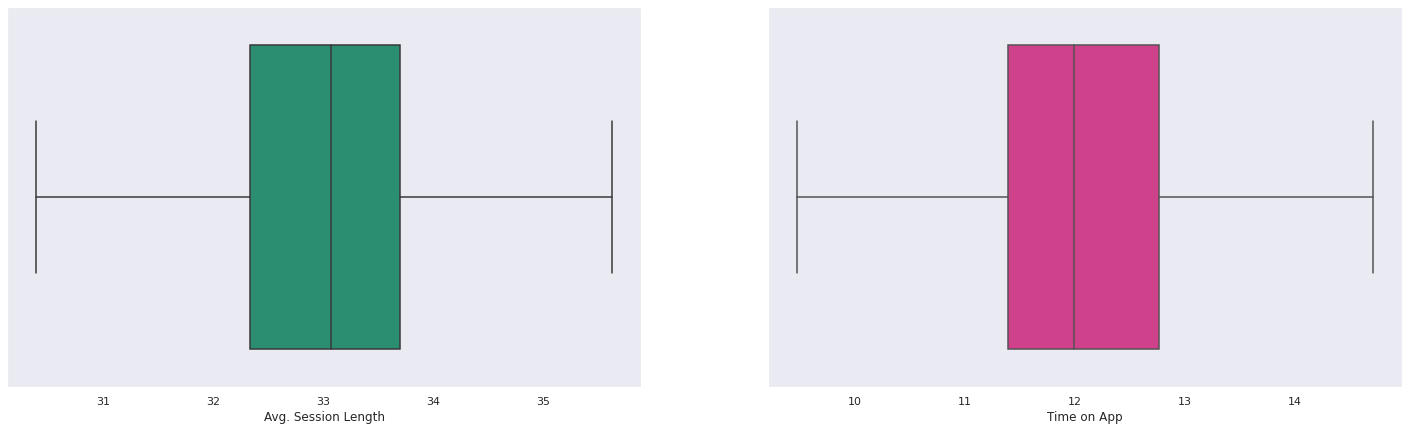

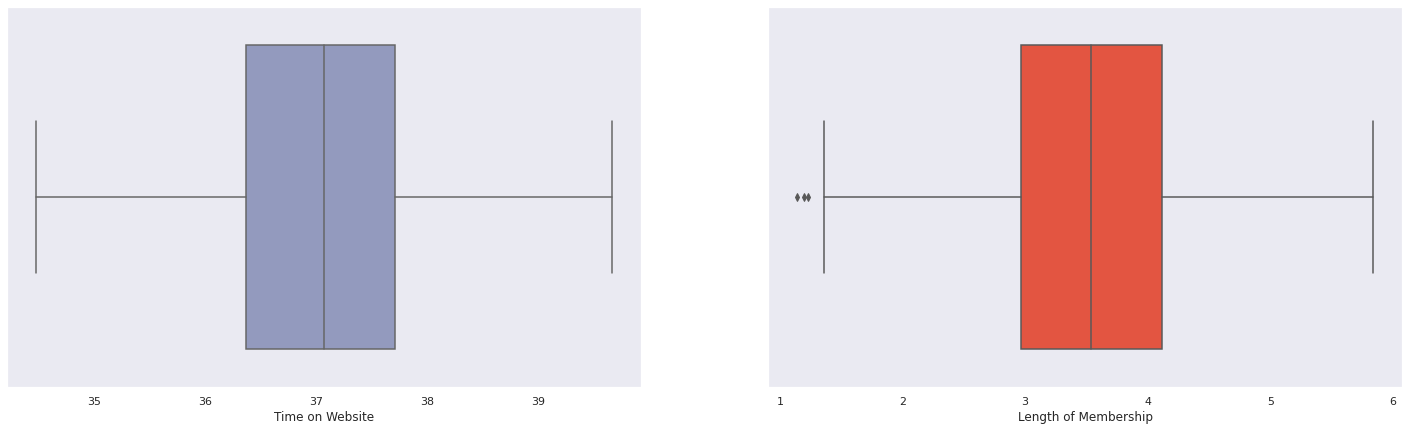

In [17]:
# After removing the outliers

fig = plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
sns.boxplot(data['Avg. Session Length'], palette='Dark2')
plt.subplot(1,2,2)
sns.boxplot(data['Time on App'], palette='Dark2_r')
plt.show()

fig = plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
sns.boxplot(data['Time on Website'], palette='BuPu')
plt.subplot(1,2,2)
sns.boxplot(data['Length of Membership'], palette='CMRmap')
plt.show()

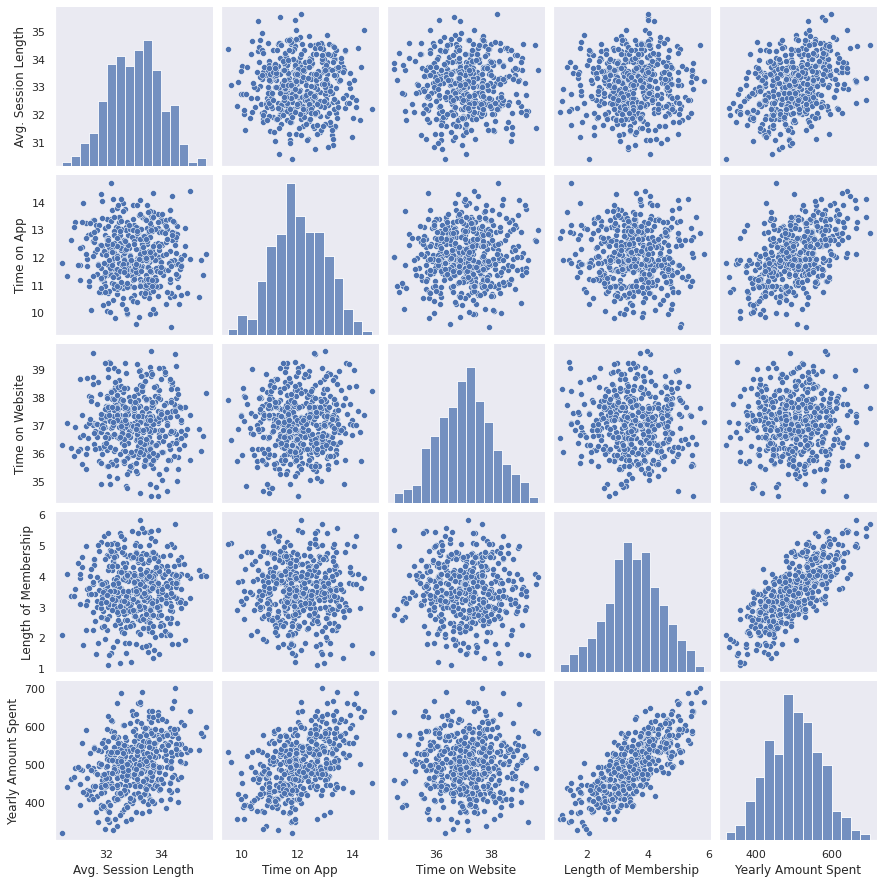

In [18]:
sns.pairplot(data)
plt.show()

From the **bivariate analysis** of the attributes it seems that there is a highly linear relationship between length of membership and yearly amount spent and also between time on app and yearly amount spent. This plots shows that the variables Time on App and Length of Membership are the most significant variables.

## Checking for Normality

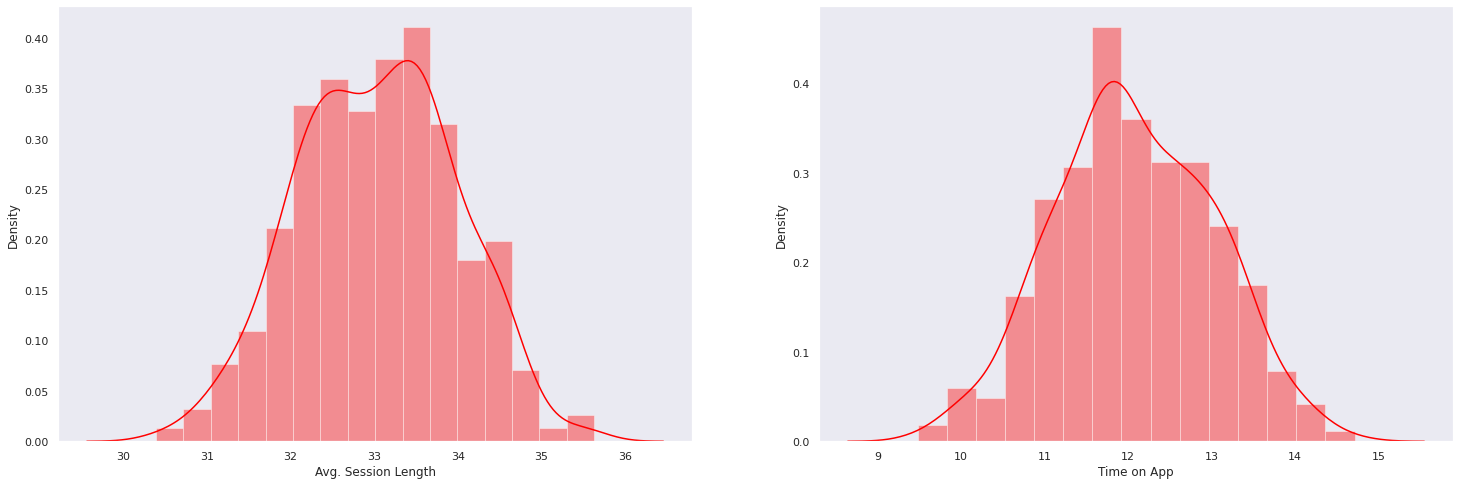

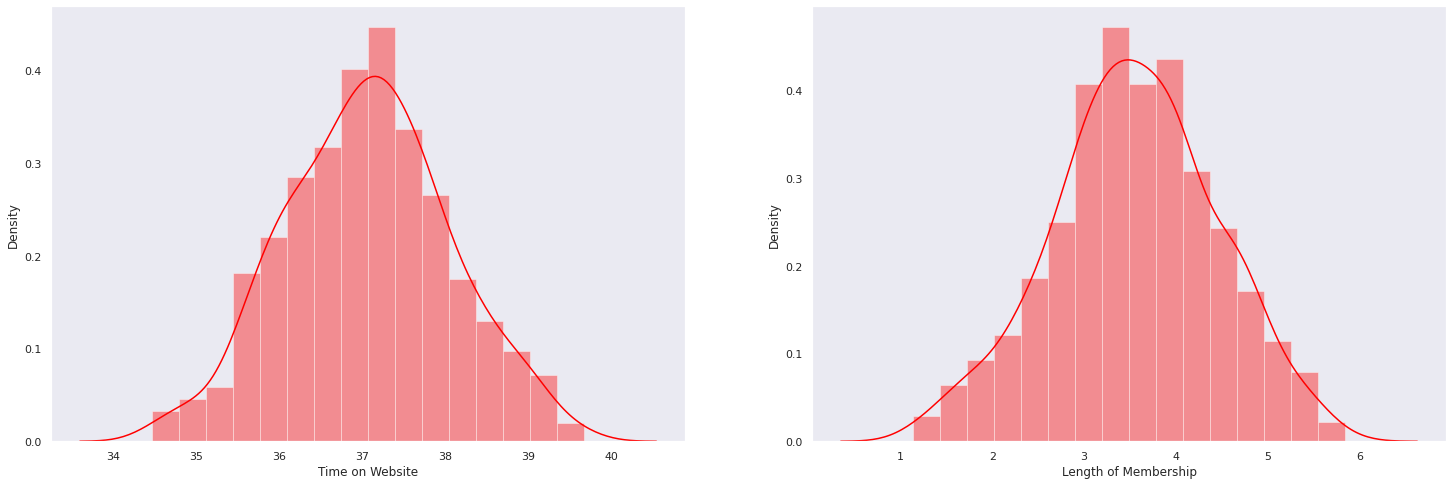

In [19]:
# Checking the distributions of independent variables

fig = plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
sns.distplot(data['Avg. Session Length'],color='red')

plt.subplot(1,2,2)
sns.distplot(data['Time on App'],color='red')
plt.show()

fig = plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
sns.distplot(data['Time on Website'],color='red')
plt.subplot(1,2,2)
sns.distplot(data['Length of Membership'],color='red')
plt.show()

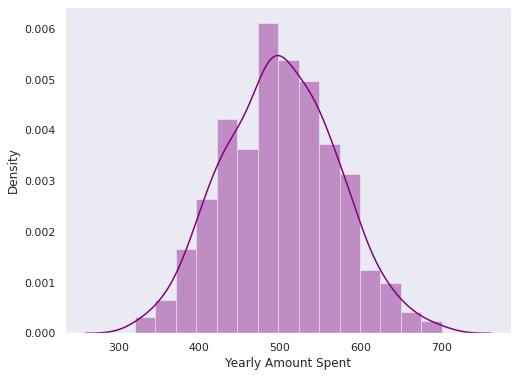

In [20]:
## Checking for the distribution of target variable

fig = plt.figure(figsize=(8,6))
sns.distplot(data["Yearly Amount Spent"],color='purple')
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Density')
plt.show()

From the above plots we can say that all our variables are normally distributed and therfore satisfy the normaity assumption.

## Multicollinearity

To determine the linearity, we start by calculating the correlation between the independent variables.

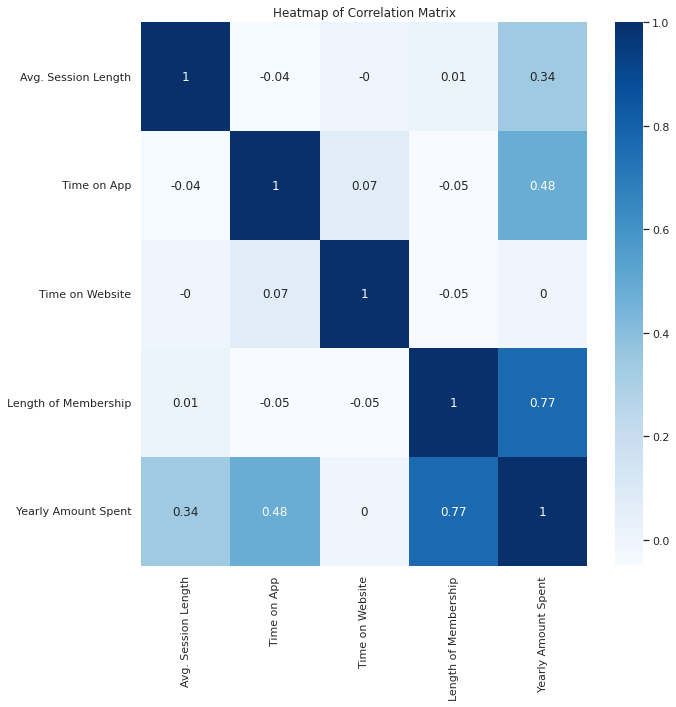

In [21]:
# Calculating the correlation coefficients of the independent variables and rounding it off to 2 digits

correlation_matrix=np.round(data.corr(), 2)

# Plotting the correlation matrix

fig = plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix,cmap='Blues' ,annot=True)
plt.title("Heatmap of Correlation Matrix")
plt.show()

The correlation matrix shows that the target variable Yearly Amount Spent is highly correlated to the independent variable Length of Membership. The only variables that are significantly correlated are with the target variable Yearly Amount Spent. The independent variables doesn't have any significant correlation among themselves.

So, there is no linearity between any of the independent variables and so the data follows the assumption that there should not exist any multicollinearity between the independent variables.

## Data Partition into Training and Testing

In [22]:
from sklearn.model_selection import train_test_split

x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state=0)

x_train.shape, x_test.shape

((357, 4), (119, 4))

## Model Construction and Validation

Constructing a **Multiple Linear Regression** model on the data.

In [23]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

y_linear_pred = linear_reg.predict(x_test)

In [24]:
print('Mean absolute error: ',mean_absolute_error(y_test,y_linear_pred))
print()
print('Root mean squared error: ', np.sqrt(mean_absolute_error(y_test,y_linear_pred)))
print()
print('R2 score: ',r2_score(y_test,y_linear_pred))

Mean absolute error:  8.915078358001304

Root mean squared error:  2.985812847115724

R2 score:  0.9695910811171984


So, the accuracy of the predicted model is btained to be 96.95%.

As the amount of the data in the dataset is not very large, we use K-fold Cross Validation Technique to make sure that the predicted model is the best choice.

### K-fold Cross Validation

In [25]:
# Using k=10 in K-fold Cross Validation
cvs = cross_val_score(linear_reg,x,y,cv=10)

print('Accuracy: {:.2f} %'.format(cvs.mean()*100))
print('Standard Deviation {:.2f} %'.format(cvs.std()*100))

Accuracy: 97.75 %
Standard Deviation 0.53 %


This shows that the standard deviation is very low and so the predicted linear regression model is the best choice for the dataset and the accuracy of the model is **97.75%** with a standard deviation of **0.53%**.

## Checking Assumptions of Linear Regression

## Linearity of Residuals

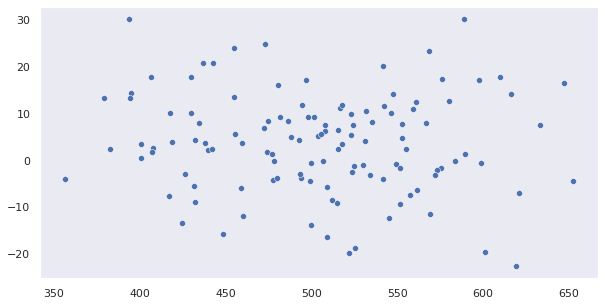

In [26]:
Err=y_test-y_linear_pred

plt.figure(figsize=(10,5))
sns.scatterplot(y_linear_pred,Err)
plt.show()

This shows that the residuals are randomly dispersed along the horizontal axis. So, the linearity assumption is satisfied.

## Distribution of Residuals

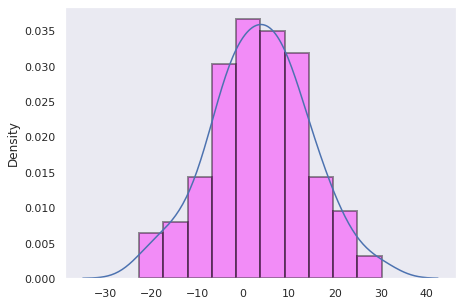

In [27]:
# Distribution plot of residuals

plt.figure(figsize=(7,5))
sns.distplot(Err,hist_kws=dict(color='magenta',edgecolor="black", linewidth=2))
plt.show()

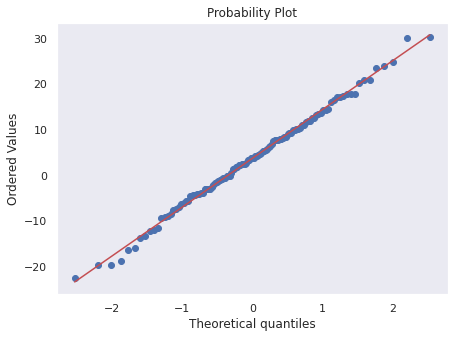

In [28]:
# QQ plot of residuals

plt.figure(figsize=(7,5))
stats.probplot(Err,plot=plt)
plt.show()

The distribution plot of the residuals and the qq plot of the residuals shows that the residuals follow normal distribution. So, the residuals satisfies the normality assumption.

## Homoscedasticity

The linear regression analysis is made on the assumption that the residuals are homoscedastic, that is the residuals have almost same variance across the regression line. This can be checked using a scatter plot for the residuals against the predicted values.

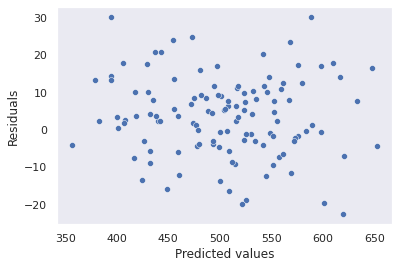

In [29]:
sns.scatterplot(y_linear_pred,Err)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

As the scatter plot shows that the residuals doesn't form any definite pattern, there isn't any heteroscedasticity in the data. So, the data is homoscedastic and satisfies the assumption of homoscedasticity for the linear regression.

## Autocorrelation

It can be observed from the above residual plot that there is no specific pattern among the residuals which means that there is no autocorrelation.

Applying Durbin Watson Test for the further validation of the model's autocorrelation.

In [30]:
# Applying Durbin-Watson Test

from statsmodels.stats.stattools import durbin_watson

d=durbin_watson(Err)
print("Durbin-Watson Statistic : {}" .format(d))

Durbin-Watson Statistic : 1.9907404245467226


As the Durbin Watson Statistic lies between the values 1.8 and 2.2, there is no autocorrelation between the residuals.

So, it is clear that the fitted model satisfies all the assumptions of the linear regression and can be used to draw inferences of the data from the model.

## Interpretation of the model

In [31]:
# The coefficients and intercept of the regression model are
print("Coefficients : ", linear_reg.coef_)
print("Intercept : ",linear_reg.intercept_)

Coefficients :  [26.03336703 39.20012732  0.23042303 61.28109167]
Intercept :  -1059.5410514245923


In [32]:
#Converting it into a dataframe
pd.DataFrame(data=linear_reg.coef_, 
             index=['Avg. Session Length','Time on App','Time on Website','Length of Membership'], 
             columns=['Coefficient'])

,Coefficient
Avg. Session Length,26.033367
Time on App,39.200127
Time on Website,0.230423
Length of Membership,61.281092


## Conclusion

The predicted model is found to be 97.75% accurate.

The inferences that can be drawn from the linear regression model are,

1) Increase of one unit in Avg. Session Length results in an increase of $ 26.033367 of Yearly Amount Spent.

2) Increase of one unit in Time on App results in an increase of $ 39.200127 of Yearly Amount Spent.

3) Increase of one unit in Time on Website results in an increase of $ 0.230423 of Yearly Amount Spent.

4) Increase of one unit in Length of Membership results in an increase of $ 61.281092 of Yearly Amount Spent.

So, the company needs to focus mostly on the strategies to motivate the customers to take longer terms of membership in order to increase the revenue.

It should also focus on app rather than on website as the app is generating more revenue for the company. 